<center>
  <h1> Analyse des Sentiments </h1>
</center>

# 1- installation et Importation des bibliothèques nécessaires

## 1-1 INSTALLATION

Dans le cadre de notre projet d'analyse des sentiments en utilisant le traitement du langage naturel (NLP), nous avons sélectionné plusieurs bibliothèques Python puissantes pour manipuler, visualiser et analyser les données. Ces bibliothèques sont essentielles pour le développement d'un modèle d'analyse des sentiments robuste et la création de visualisations informatives.

Nous utiliserons Pandas, Matplotlib, et Seaborn pour la manipulation et la visualisation des données, TensorFlow et PyTorch pour la mise en œuvre de modèles d'apprentissage automatique, ainsi que NLTK et Transformers pour le traitement du langage naturel. De plus, des outils comme WordCloud nous aideront à explorer visuellement les motifs dans le texte.


1. **Seaborn:**
   - Visualisation de données basée sur Matplotlib. Pour l'installer, utilisez : `!pip install seaborn --upgrade`

2. **TensorFlow:**
   - Bibliothèque d'apprentissage automatique pour créer, former et déployer des modèles. Pour l'installer, utilisez : `!pip install tensorflow`

3. **Torch (PyTorch):**
   - Bibliothèque d'apprentissage automatique open-source pour la recherche et le développement de modèles. Pour l'installer, utilisez : `!pip install torch`

4. **Flax:**
   - Bibliothèque pour le développement d'applications en intelligence artificielle basée sur la programmation fonctionnelle. Pour l'installer, utilisez : `!pip install flax`

5. **Torch, torchvision, torchaudio:**
   - Composants de l'écosystème PyTorch pour le traitement des données, la vision par ordinateur et l'audio. Pour les installer, utilisez : `!pip install torch torchvision torchaudio`

6. **WordCloud:**
   - Création de nuages de mots à partir de texte. Pour l'installer, utilisez : `!conda install -c conda-forge wordcloud`

7. **Pandas, Matplotlib, Seaborn:**
   - Bibliothèques pour la manipulation et la visualisation de données. Pandas est souvent déjà inclus dans les environnements Python. Pour installer Matplotlib et Seaborn, utilisez : `!pip install matplotlib seaborn`

8. **NLTK (Natural Language Toolkit):**
   - Bibliothèque de traitement du langage naturel. Pour l'installer, utilisez : `!pip install nltk`

9. **Transformers:**
   - Bibliothèque pour l'utilisation de modèles pré-entraînés. Pour l'installer, utilisez : `!pip install transformers`

10. **SciPy:**
    - Bibliothèque scientifique pour les opérations mathématiques et statistiques. Souvent inclus dans les distributions Python. Si nécessaire, installez avec : `!pip install scipy`

11. **tqdm:**
    - Barre de progression pour les boucles.
    Pour l'installer, utilisez : `!pip install tqdm`

12. **Re (module d'expressions régulières en Python):**
    - Il est inclus dans la distribution standard de Python, aucune installation supplémentaire n'est nécessaire.

13. **NumPy:**
    - Bibliothèque pour le calcul numérique en Python. Souvent inclus dans les environnements Python. Si nécessaire, installez avec : 
    `!pip install numpy`


In [ ]:
# Installation des bibliothèques
!pip install seaborn --upgrade
!pip install tensorflow
!pip install torch
!pip install flax
!pip install torch torchvision torchaudio
!conda install -c conda-forge wordcloud
!pip install pandas matplotlib seaborn nltk transformers scipy tqdm
!pip install beautifulsoup4

## 1-2 IMPORTATION

In [1]:
# Import des bibliothèques pour la manipulation de données
import pandas as pd  # Pandas pour la manipulation de données tabulaires

# Import des bibliothèques pour la visualisation de données
import matplotlib.pyplot as plt  # Matplotlib pour la création de graphiques
import seaborn as sns  # Seaborn pour des visualisations statistiques attrayantes

# Import des bibliothèques de traitement du langage naturel (NLP)
import nltk  # Bibliothèque NLTK pour le traitement du langage naturel
from nltk.corpus import stopwords  # Liste de mots vides pour le prétraitement
from nltk.tokenize import word_tokenize  # Tokenisation de mots
import string  # Opérations de chaînes de caractères

# Téléchargement des ressources nécessaires de NLTK (commenté car téléchargement uniquement nécessaire une fois)
# nltk.download('stopwords')  # Téléchargement des mots vides
# nltk.download('punkt')  # Téléchargement des modèles de tokenisation

# Import des composants de la bibliothèque Transformers pour l'utilisation de modèles pré-entraînés
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Transformers pour NLP

# Import de la fonction softmax pour normaliser les scores de classification
from scipy.special import softmax  # SciPy pour des opérations mathématiques avancées

# Import de la barre de progression pour les boucles (utile pour surveiller l'avancement)
from tqdm.notebook import tqdm  # TQDM pour une barre de progression interactive

import re  # Module d'expressions régulières en Python pour la manipulation de texte

import numpy as np  # NumPy pour des opérations numériques avancées

from wordcloud import WordCloud  # WordCloud pour la création de nuages de mots

from bs4 import BeautifulSoup

# 2- Exploration des données

## 2-1 Charger la dataset :
Démarrons notre exploration des délices culinaires sur Amazon en chargeant le jeu de données. Il regroupe près de 500 000 avis jusqu'à octobre 2012, offrant un aperçu détaillé des produits, des utilisateurs, des notations, et des textes authentiques des critiques. Cette plongée va au-delà des mets fins, incorporant des avis de différentes catégories sur Amazon.

In [2]:
data = pd.read_csv('reviews.csv')

## 2-2 Aperçu des premières lignes

La commande `data.head()` permet d'afficher les cinq premières lignes de votre ensemble de données, offrant ainsi un aperçu rapide des informations contenues dans chaque colonne. Cela facilite la compréhension initiale de la structure des données que vous manipulez.

In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 2-3 Informations générales sur la dataset

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


### Description des resultats :

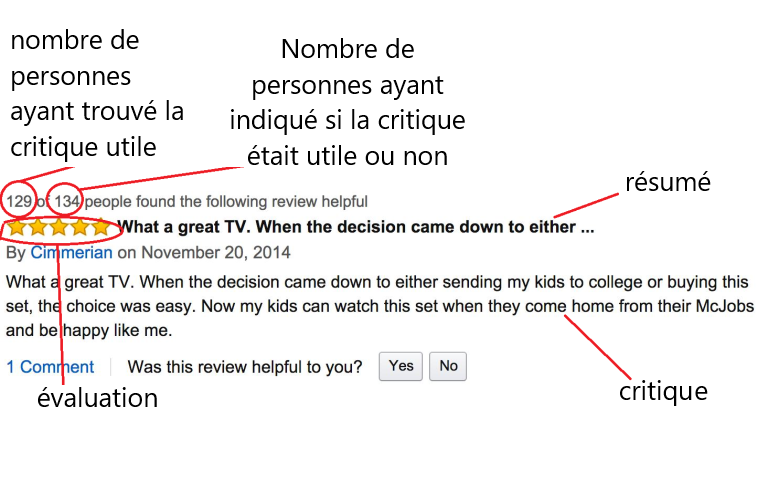

La sortie de `data.info()` fournit des informations détaillées sur la structure de votre ensemble de données. Voici une description des résultats :

- **Type de l'objet :** `pandas.core.frame.DataFrame`
- **Index :** RangeIndex, allant de 0 à 568453, indiquant le nombre total d'entrées (lignes) dans l'ensemble de données.
- **Colonnes :** Il y a 10 colonnes au total.
- **Attributs et types de données :**
  - 'Id' est de type `int64` avec 568454 valeurs non nulles.
  - 'ProductId' est de type `object` (généralement une chaîne de caractères) avec 568454 valeurs non nulles.
  - 'UserId' est de type `object` avec 568454 valeurs non nulles.
  - 'ProfileName' est de type `object` avec 568428 valeurs non nulles (26 valeurs manquantes).
  - 'HelpfulnessNumerator' est de type `int64` avec 568454 valeurs non nulles.
  - 'HelpfulnessDenominator' est de type `int64` avec 568454 valeurs non nulles.
  - 'Score' est de type `int64` avec 568454 valeurs non nulles.
  - 'Time' est de type `int64` avec 568454 valeurs non nulles.
  - 'Summary' est de type `object` avec 568427 valeurs non nulles (27 valeurs manquantes).
  - 'Text' est de type `object` avec 568454 valeurs non nulles.

- **Mémoire utilisée :** Environ 43.4 MB.

- **Valeurs manquantes :** 'ProfileName' a 26 valeurs manquantes et 'Summary' a 27 valeurs manquantes.

Ces informations sont cruciales pour comprendre la composition de votre ensemble de données, y compris les types de données, la présence de valeurs manquantes, et la mémoire utilisée par l'ensemble de données.

## 2-4 Statistiques descriptives pour les attributs numériques

In [6]:
data['Score'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

### Description des resultats :
La sortie de la commande `data['Score'].describe()` fournit des statistiques descriptives spécifiques pour la colonne 'Score' de votre ensemble de données. Voici une description des résultats :

- **count :** Le nombre total d'observations dans la colonne 'Score' est de 568,454.

- **mean :** La moyenne (valeur moyenne) des scores dans la colonne 'Score' est d'environ 4.18.

- **std :** L'écart type, qui mesure la dispersion des scores autour de la moyenne, est d'environ 1.31.

- **min :** Le score minimum observé est 1.

- **25% :** Le premier quartile (Q1) est à 4, ce qui signifie que 25% des scores sont égaux ou inférieurs à 4.

- **50% :** La médiane (Q2) est à 5, ce qui indique que 50% des scores sont égaux ou inférieurs à 5.

- **75% :** Le troisième quartile (Q3) est à 5, ce qui signifie que 75% des scores sont égaux ou inférieurs à 5.

- **max :** Le score maximum observé est 5.

Ces statistiques fournissent un aperçu de la distribution des scores dans la colonne 'Score'. En l'occurrence, la plupart des scores semblent être concentrés autour des valeurs élevées, avec une moyenne de 4.18 et une médiane de 5. Cela suggère une tendance positive dans les évaluations.

## 2-5 Vérification des valeurs manquantes ou d'incohérences

In [7]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

### Description des resultats :
La sortie que vous avez présentée est le résultat de la commande `data.isnull().sum()` et indique le nombre de valeurs manquantes pour chaque colonne de votre ensemble de données. Voici une description des résultats :

- **'Id':** Aucune valeur manquante dans la colonne 'Id'.
  
- **'ProductId':** Aucune valeur manquante dans la colonne 'ProductId'.
  
- **'UserId':** Aucune valeur manquante dans la colonne 'UserId'.
  
- **'ProfileName':** Il y a 26 valeurs manquantes dans la colonne 'ProfileName'.
  
- **'HelpfulnessNumerator':** Aucune valeur manquante dans la colonne 'HelpfulnessNumerator'.
  
- **'HelpfulnessDenominator':** Aucune valeur manquante dans la colonne 'HelpfulnessDenominator'.
  
- **'Score':** Aucune valeur manquante dans la colonne 'Score'.
  
- **'Time':** Aucune valeur manquante dans la colonne 'Time'.
  
- **'Summary':** Il y a 27 valeurs manquantes dans la colonne 'Summary'.
  
- **'Text':** Aucune valeur manquante dans la colonne 'Text'.

Ces résultats vous indiquent les colonnes spécifiques qui ont des valeurs manquantes et le nombre de ces valeurs manquantes. C'est important pour décider comment traiter ces valeurs manquantes, que ce soit en les supprimant, en les remplaçant par des valeurs par défaut ou en utilisant d'autres méthodes de gestion des données manquantes en fonction du contexte de votre analyse.

## 2-6 Vérifier les valeurs uniques dans chaque colonne

In [8]:
data.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### Description des resultats :
La sortie de `data.nunique()` donne le nombre de valeurs uniques dans chaque colonne de votre ensemble de données. Voici une description des résultats pour chaque colonne :

- **'Id':** 568454 valeurs uniques.
  
- **'ProductId':** 74258 valeurs uniques.
  
- **'UserId':** 256059 valeurs uniques.
  
- **'ProfileName':** 218415 valeurs uniques.
  
- **'HelpfulnessNumerator':** 231 valeurs uniques.
  
- **'HelpfulnessDenominator':** 234 valeurs uniques.
  
- **'Score':** 5 valeurs uniques (ce qui est cohérent avec le fait que les scores sont souvent évalués sur une échelle discrète).
  
- **'Time':** 3168 valeurs uniques.
  
- **'Summary':** 295742 valeurs uniques.
  
- **'Text':** 393579 valeurs uniques.

Ces informations peuvent être utiles pour comprendre la diversité des données dans chaque colonne. Par exemple, dans la colonne 'Score', il y a seulement 5 valeurs uniques, indiquant probablement une échelle de notation restreinte. D'un autre côté, dans la colonne 'Text', il y a 393579 valeurs uniques, soulignant la variété des textes présents dans cet ensemble de données.

# 3- Prétraitement des données :

## 3-1 Supprimer les lignes en double


In [9]:
data.drop_duplicates(inplace=True)

## 3-2 Gérer les valeurs manquantes

In [10]:
data.dropna(inplace=True)

# 4- Analyse Exploratoire des Données (EDA)

## 4-1 Vérifier la distribution des scores 

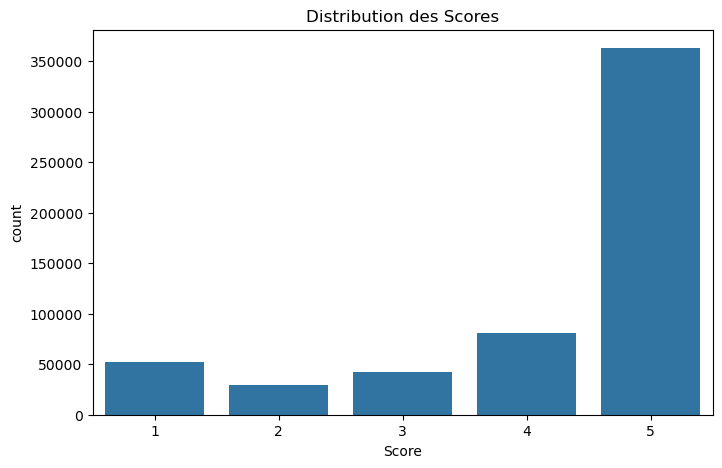

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.show()

### Expliquons les résultats :

- **Score 5 :** Il y a 363,122 occurrences où le score est égal à 5.
  
- **Score 4 :** Il y a 80,655 occurrences où le score est égal à 4.

- **Score 1 :** Il y a 52,268 occurrences où le score est égal à 1.

- **Score 3 :** Il y a 42,640 occurrences où le score est égal à 3.

- **Score 2 :** Il y a 29,769 occurrences où le score est égal à 2.

Ces résultats donnent une vue détaillée de la distribution des scores dans votre ensemble de données. Par exemple, le score 5 est largement plus fréquent que les autres scores, suggérant que la majorité des évaluations sont positives. À l'inverse, les scores 1, 2 et 3 sont moins fréquents, indiquant une proportion plus faible d'évaluations négatives ou neutres. Cette information peut être utile pour comprendre la tendance générale des évaluations dans votre ensemble de données.

## 4-2 Afficher quelques exemples de résumés et de textes

In [12]:
print("Exemples de résumés :")
print(data['Summary'].sample(2).values)

print("\nExemples de textes :")
data['Text'].sample(2).values

Exemples de résumés :
['I love this stuff!' 'A must have for every pregnant woman']

Exemples de textes :


array(["I moved from Texas to Ohio a few weeks ago and happened to run across these at a local farmer's market. I bought one solely because I thought the packaging was cute and I love popcorn balls and this is essentially a popcorn ball shaped like an ear of corn. I've searched far and wide for good store bought popcorn balls and usually couldn't find them until around Halloween and even then they were sub par. Same goes for up here, the only place I could find these was at a farmer's market where they were selling them for $3 a pop! So until now I was stuck making my own which is really a pain. As soon as I sunk my teeth into one of these I was in love. The popcorn is rich, buttery, and delicious, they are oozing with caramel which is exactly how I like it but surprisingly they aren't overly sweet. Everything about these is just right, the crunch, the sweetness, the softness, the butteriness, everything is just perfect. I raved to my husband about how awesome they were but how I could

## 4-3 Calcul de la moyenne et de la médiane des scores dans les données

In [13]:
print("Average Score: ",np.mean(data.Score))
print("Median Score: ",np.median(data.Score))

Average Score:  4.183296651483723
Median Score:  5.0


Comme nous pouvons l'observer, la majorité des scores sont égaux à 4 et 5, avec une moyenne de 4,18. En raison de la distribution très inclinée vers la gauche, nous ferons une prédiction binaire. Nous pouvons considérer qu'un avis négatif aura un score entre 1 et 3, et un avis positif aura un score égal à 4 ou 5.

## 4-4 Distribution des avis positifs et négatifs

In [14]:
data.loc[data['Score'] > 3, 'Sentiment'] = "POSITIF"
data.loc[data['Score'] <= 3, 'Sentiment'] = "NEGATIF"

Après avoir créé une nouvelle variable appelée Sentiment, définie comme NÉGATIVE lorsque le score est compris entre 1 et 3, et POSITIVE lorsque le score est égal à 4 ou 5, nous obtenons cette nouvelle distribution :

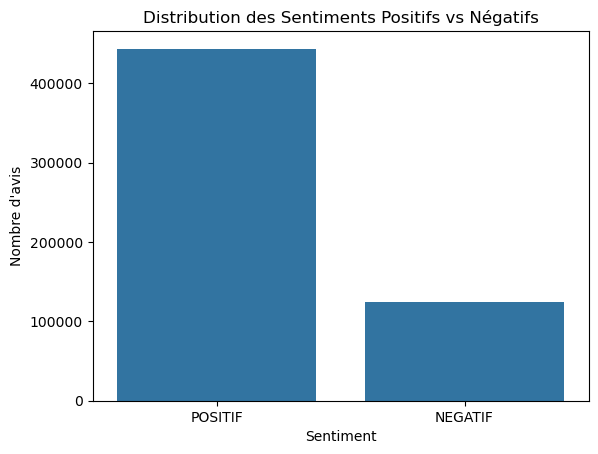

In [15]:
ax = plt.axes()
sns.countplot(x='Sentiment', data=data, ax=ax)
ax.set_title('Distribution des Sentiments Positifs vs Négatifs')
ax.set_ylabel("Nombre d'avis")
plt.show()

# 5- Traitement du texte

### ON VA TRAVAILLER SUR 100000 LIGNE

In [16]:
data = data.head(100000)

le code suivant réalise les actions suivantes :

1. Gère les valeurs manquantes en remplaçant par des chaînes vides.
2. Applique un processus de prétraitement au texte dans les colonnes 'Summary' et 'Text', supprimant la ponctuation, mettant en minuscules et supprimant les stopwords.

In [17]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Vérifier si le texte ressemble à une URL
    if re.match(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text):
        # Si c'est une URL, vous pouvez utiliser une bibliothèque comme requests pour récupérer le contenu
        # text = récupérer_contenu_de_lurl(text)
        pass
    else:
        # Supprimer les balises HTML avec BeautifulSoup
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Supprimer les caractères non alphabétiques
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convertir le texte en minuscules
    text = text.lower()

    # Supprimer les stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

tqdm.pandas()
data['Processed_Text'] = data['Text'].progress_apply(preprocess_text)

# Afficher les premières lignes après le prétraitement
data.head()

  0%|          | 0/100000 [00:00<?, ?it/s]

C:\Users\BYDEVMAR\AppData\Local\Temp\ipykernel_13796\2932768173.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Processed_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,POSITIF,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIF,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,POSITIF,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,NEGATIF,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,POSITIF,great taffy great price wide assortment yummy ...


# 5- Utilisation de modèle pré-entraîné Roberta
## 5-1 Initialisation du Modèle RoBERTa pour l'Analyse de Sentiments

In [18]:
# Définition du modèle pré-entraîné à utiliser (dans ce cas, le modèle de sentiment basé sur RoBERTa pour Twitter)
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Initialisation du tokenizer avec le modèle pré-entraîné
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Initialisation du modèle de classification de séquence basé sur RoBERTa pour Twitter
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


## 5-2 Fonction d'Évaluation des Scores de RoBERTa pour l'Analyse de Sentiments
Cette fonction, nommée "roberta_scores", prend en entrée un exemple de texte, l'encode à l'aide du tokenizer associé au modèle RoBERTa pré-entraîné pour l'analyse de sentiments sur Twitter, puis utilise le modèle pour obtenir des scores de sentiment. Les scores sont ensuite normalisés avec la fonction softmax et renvoyés sous forme de dictionnaire comprenant les probabilités associées aux classes négative, neutre et positive.

In [19]:
def roberta_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits.detach().numpy()
    scores = softmax(scores, axis=1)
    scores_dict = {
        'rta_neg': scores[0, 0],
        'rta_neu': scores[0, 1],
        'rta_pos': scores[0, 2]
    }
    return scores_dict

## 5-3 Analyse de Sentiments avec RoBERTa sur l'Ensemble de Données
Ce code parcourt chaque ligne de l'ensemble de données 'data', récupère le texte et l'identifiant associé, puis utilise la fonction 'roberta_scores' pour effectuer une analyse de sentiment avec le modèle RoBERTa pré-entraîné. Les résultats de RoBERTa sont ensuite stockés dans un dictionnaire 'res', associant chaque identifiant à ses scores de sentiment correspondants. En cas d'erreur de type RuntimeError, un message est affiché indiquant l'échec de l'analyse pour un identifiant spécifique.

In [ ]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Processed_Text']  # Assuming 'Processed_Text' is the column containing preprocessed text
        my_id = row['Id']

        # Perform sentiment analysis with RoBERTa
        roberta_result = roberta_scores(text)

        # Keep only RoBERTa results
        res[my_id] = roberta_result
    except RuntimeError:
        print(f'Problème dans ID {my_id}')

  0%|          | 0/100000 [00:00<?, ?it/s]

Problème dans ID 540
Problème dans ID 1321
Problème dans ID 1498
Problème dans ID 2248
Problème dans ID 8077
Problème dans ID 8757
Problème dans ID 9850
Problème dans ID 10005
Problème dans ID 18192
Problème dans ID 19568
Problème dans ID 19828
Problème dans ID 20420
Problème dans ID 22479
Problème dans ID 22484
Problème dans ID 26115
Problème dans ID 27541
Problème dans ID 27585
Problème dans ID 29110


In [115]:
# Affichage du dictionnaire résultant de l'analyse de sentiment avec RoBERTa
res

{1: {'rta_neg': 0.009624235, 'rta_neu': 0.049980413, 'rta_pos': 0.94039536},
 2: {'rta_neg': 0.508986, 'rta_neu': 0.45241365, 'rta_pos': 0.038600367},
 3: {'rta_neg': 0.0032289017, 'rta_neu': 0.09806742, 'rta_pos': 0.8987037},
 4: {'rta_neg': 0.0022951262, 'rta_neu': 0.090219185, 'rta_pos': 0.90748566},
 5: {'rta_neg': 0.0016347275, 'rta_neu': 0.0103024645, 'rta_pos': 0.98806286},
 6: {'rta_neg': 0.006129598, 'rta_neu': 0.021795876, 'rta_pos': 0.97207445},
 7: {'rta_neg': 0.0013047527, 'rta_neu': 0.007773782, 'rta_pos': 0.99092144},
 8: {'rta_neg': 0.0020293545, 'rta_neu': 0.0056851967, 'rta_pos': 0.9922855},
 9: {'rta_neg': 0.0038735764, 'rta_neu': 0.09415626, 'rta_pos': 0.9019701},
 10: {'rta_neg': 0.0031034541, 'rta_neu': 0.055912167, 'rta_pos': 0.9409843},
 11: {'rta_neg': 0.019134084, 'rta_neu': 0.071044356, 'rta_pos': 0.9098216},
 12: {'rta_neg': 0.37264338, 'rta_neu': 0.519699, 'rta_pos': 0.107657686},
 13: {'rta_neg': 0.46612468, 'rta_neu': 0.4152592, 'rta_pos': 0.11861616},
 1

## 5-4 Transformation et Fusion des Résultats d'Analyse de Sentiments avec les Données d'Origine

In [ ]:
df = pd.DataFrame(res).T
df = df.reset_index().rename(columns={'index': 'Id'})
df = df.merge(data, how='left')
df
df.to_csv('nlp_result.csv', index=False)

# 6- Visualisations

## 6-1 Charger les données à partir du fichier CSV

In [106]:
l_df = pd.read_csv('nlp_result.csv')
l_df.head()

,Id,rta_neg,rta_neu,rta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Processed_Summary,Processed_Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,good quality dog food,bought several vitality canned dog food produc...
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,advertised,product arrived labeled jumbo salted peanuts p...
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,delight says,confection around centuries light pillowy citr...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,cough medicine,looking secret ingredient robitussin believe f...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy,great taffy great price wide assortment yummy ...


In [107]:
l_df = l_df.replace([np.inf, -np.inf], np.nan)

## 6-2 la distribution des sentiments selon ROBERTA

In [108]:
plt.figure(figsize=(8, 5))
sns.histplot(l_df['rta_pos'], bins=30, color='green', label='Positif')
sns.histplot(l_df['rta_neu'], bins=30, color='gray', label='Neutre')
sns.histplot(l_df['rta_neg'], bins=30, color='red', label='Négatif')
plt.title('Distribution des Sentiments Prédits')
plt.xlabel('Probabilité du Sentiment')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

TypeError: 'Figure' object is not callable

L'analyse des résultats révèle une nette prédominance des prédictions positives, où la majorité des observations affichent des probabilités de sentiment élevées, dépassant 0.9. La catégorie neutre présente une distribution plus équilibrée des probabilités, tandis que la catégorie négative se caractérise par une concentration marquée vers des probabilités plus faibles, principalement en dessous de 0.1. Ces tendances mettent en lumière les degrés de confiance variables du modèle RoBERTa dans ses prédictions de sentiments.

## 6-3 Diagramme circulaire des proportions de sentiments

In [109]:
nombre_sentiments = [len(l_df[l_df['rta_pos'] >= 0.5]),
                    len(l_df[(l_df['rta_neu'] >= 0.5) & (l_df['rta_pos'] < 0.5)]),
                    len(l_df[l_df['rta_neg'] >= 0.5])]

etiquettes = ['Positif', 'Neutre', 'Négatif']
couleurs = ['green', 'gray', 'red']

plt.pie(nombre_sentiments, labels=etiquettes, colors=couleurs, autopct='%1.1f%%', startangle=90)
plt.title('Proportion des Sentiments Prédits')
plt.show()


TypeError: 'Text' object is not callable

La majorité des prédictions sont positives, représentant 83% du total. Les prédictions neutres sont moins fréquentes, constituant seulement 2.1%, tandis que les prédictions négatives représentent 14.9% de l'ensemble des observations. Ces proportions offrent un aperçu clair de la préférence du modèle pour des sentiments majoritairement positifs.

## 6-4 Nuage de mots des avis positifs et négatifs

In [110]:
# Filtrer les textes prédits comme positifs
texte_positif = ' '.join(l_df[l_df['rta_pos'] >= 0.5]['Processed_Text'])

# Générer le nuage de mots pour les textes positifs
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(texte_positif)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots pour les Avis Positifs')
plt.show()

TypeError: 'Figure' object is not callable

In [118]:
# Filtrer les textes prédits comme négatifs
texte_negatif = ' '.join(l_df[l_df['rta_neg'] >= 0.8]['Processed_Text'])

# Générer le nuage de mots pour les textes négatifs
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(texte_negatif)

# Afficher le nuage de mots pour les textes négatifs
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots pour les Avis Négatifs')
plt.show()

TypeError: 'Figure' object is not callable

# 6-4 Analyse des textes mal classés

Même si la plupart des textes sont correctement classés, il y aura toujours quelques phrases ambiguës et mal classées. Parfois, elles peuvent sembler positives, mais en réalité, elles sont négatives. De la même manière, des phrases positives peuvent parfois sembler négatives. À présent, explorons quelques textes que nos modèles classent incorrectement.

In [111]:
l_df.query("Score == 1").sort_values("rta_pos" , ascending=False)['Text'].values[7]

"I was not impressed with these cookies when I tried them, when they first came out and the company had only one flavor. I did not care for them but I knew that something more satisfying could be had because I'd tried others.<br /><br />I have found many great paleo cookie recipes on web sites and in paleo cookbooks that I love and they my friends, cooking students, and neighbors have really enjoyed. If you're looking for rock your taste buds paleo cookies, I suggest you check out the recipes for chocolate chip cookies and other flavors of cookies made from blanched almond flour found in The Gluten Free Almond Flour Cookbook, Make It Paleo, and on Elana Amsterdam's web site."

**ICI La critique est négative. La personne n'a pas aimé les cookies de la société au départ, mais suggère des recettes de cookies paléo provenant d'autres sources qu'elle et ses amis ont appréciées. Il est à noter que Roberta a mal classé cette critique.**

In [116]:
l_df.query("Score == 5").sort_values("rta_neg" , ascending=False)['Text'].values[3]

"this gum is super sick.tatooes are killin.flavor is a spankin'.this brings back bomb diggity memories yo.peace out."

The sentence is positive. It uses informal and slang language to express enthusiasm and satisfaction with the gum, tattoos, flavor, and the associated memories.